# 패키지 호출

In [ ]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화
sns.set(font="AppleGothic",
        rc={"axes.unicode_minus": False},
        style='darkgrid')

# 데이터 호출

In [ ]:
출상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (상선,내선).csv')
출하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (하선,외선).csv')
퇴상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (상선,내선).csv')
퇴하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (하선,외선).csv')
출상내1 = 출상내[출상내['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출하외1 = 출하외[출하외['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴상내1 = 퇴상내[퇴상내['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴하외1 = 퇴하외[퇴하외['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출상내1 = 출상내.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
출하외1 = 출하외.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴상내1 = 퇴상내.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴하외1 = 퇴하외.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)

하선 외선 출근 노선: 2,3,4,7 <br>
하선 외선 퇴근 노선:2,5,6,7 <br>
상선 내선 출근 노선:2,5,6,7 <br>
상선 내선 퇴근 노선:2,3,4,7 <br>

# 출근 상선 내선

## OneHotEncoding

In [ ]:
'''

selected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)',
                         '열차내 사고',
                         '역구내 사고',
                         '출입문관련',
                         '승강설비관련',
                         '발빠짐',
                         '기타',
                         '총사고발생수',
                         '반경 내 학교 수',
                         '반경 내 주요공원 수',
                         '반경 내 대학 수',
                         '반경 아파트 수',
                         '반경 내 대학교 수',
                         '공공 자전거 시설 수',
                       '총층수']

# 원 핫 인코딩 수행

df_selected = 출상내1[selected_columns].copy()
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = encoder.fit_transform(df_selected)
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(selected_columns))
출상내1 = 출상내1.drop(columns=selected_columns)
출상내1 = pd.concat([출상내1, df_encoded], axis=1)
출상내1

'''

"\n    \nselected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)', \n                         '열차내 사고',\n                         '역구내 사고', \n                         '출입문관련', \n                         '승강설비관련', \n                         '발빠짐',\n                         '기타',\n                         '총사고발생수',\n                         '반경 내 학교 수',\n                         '반경 내 주요공원 수', \n                         '반경 내 대학 수',\n                         '반경 아파트 수',\n                         '반경 내 대학교 수',\n                         '공공 자전거 시설 수',\n                       '총층수']\n    \n# 원 핫 인코딩 수행\n\ndf_selected = 출상내1[selected_columns].copy()\nencoder = OneHotEncoder(drop='first', sparse=False)\ndf_encoded = encoder.fit_transform(df_selected)\ndf_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(selected_columns))\n출상내1 = 출상내1.drop(columns=selected_columns)\n출상내1 = pd.concat([출상내1, df_encoded], axis=1)\n출상내1\n\n"

selected_columns에 있는 변수들은 수치형 변수임에도 고유값이 적고 0인 값들이 너무 많아 PCA에 오히려 안좋은 영향(차원의 저주)을 줄 것같아 <br>
일단 제거 후 진행 또한 승안님이 범주형 변수의 VIF 값등을 확인한 결과 -30이 나오는 등 답도 없는 경우가 많아 제거 없내는 근거를 확실히할 필요가 있음 <br> 만약 확실히 하지 못할 것 같으면 데이터 수집 아예 안한걸로 하는게 나을 수도 있음.

In [ ]:
selected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)',
                         '열차내 사고',
                         '역구내 사고',
                         '출입문관련',
                         '승강설비관련',
                         '발빠짐',
                         '기타',
                         '총사고발생수',
                         '반경 내 학교 수',
                         '반경 내 주요공원 수',
                         '반경 내 대학 수',
                         '반경 아파트 수',
                         '반경 내 대학교 수',
                         '공공 자전거 시설 수',
                       '총층수']
출상내1 = 출상내1.drop(columns=selected_columns);출상내1

# '승차인원' 변수 생성
출상내1['승차인원'] = 출상내1['승차인원_0708'] + 출상내1['승차인원_0809'] + 출상내1['승차인원_0910']

# '하차인원' 변수 생성
출상내1['하차인원'] = 출상내1['하차인원_0708'] + 출상내1['하차인원_0809'] + 출상내1['하차인원_0910']

# 필요한 변수들 제거
variables_to_drop = ['승차인원_0708', '승차인원_0809', '승차인원_0910', '하차인원_0708', '하차인원_0809', '하차인원_0910',
                    '출근출발_EE', '출근출발_EH', '출근출발_EW', '출근도착_EE', '출근도착_EH', '출근도착_EW']
출상내1.drop(columns=variables_to_drop, inplace=True)

# 결과 확인
출상내1

,출근_상내선_배차간격,환승유입인원수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW,승차인원,하차인원
0,4.551724,831737,31.771429,24991,2311,88696,5548,4832,7179,56430,3076,325838,5635,1869,7809,145745,732361
1,4.581897,315530,45.414286,31376,2316,122460,3358,1803,3298,26163,2205,88296,2151,2753,2462,258389,106221
2,4.600877,374321,36.428571,29428,2599,130241,1890,3677,2820,52120,2705,98437,3539,2361,2936,197069,133621
3,4.500000,367316,31.142857,29890,2654,95422,4083,3046,5008,38890,2009,186677,4045,1936,4732,87221,333984
4,4.565217,731249,46.157143,24096,1788,95008,3212,2718,2629,42617,2646,416612,3425,1962,5980,408161,450322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,4.693694,147598,77.542857,41350,1118,177399,3477,1681,3573,18426,1316,45777,1778,3482,1527,136440,30897
167,4.817352,244815,29.214286,14222,1325,44536,4729,4209,5446,81903,1431,417692,7768,1178,8045,36169,296046
168,5.029412,95405,23.385714,42997,2288,153883,3391,2755,3132,36556,2178,72852,2861,4220,2697,64270,38634
169,5.144928,246439,20.328571,18891,1304,67804,828,766,1110,7177,906,13528,552,1456,572,172250,58814


## scailing

변수 스케일 전 데이터 분포 확인

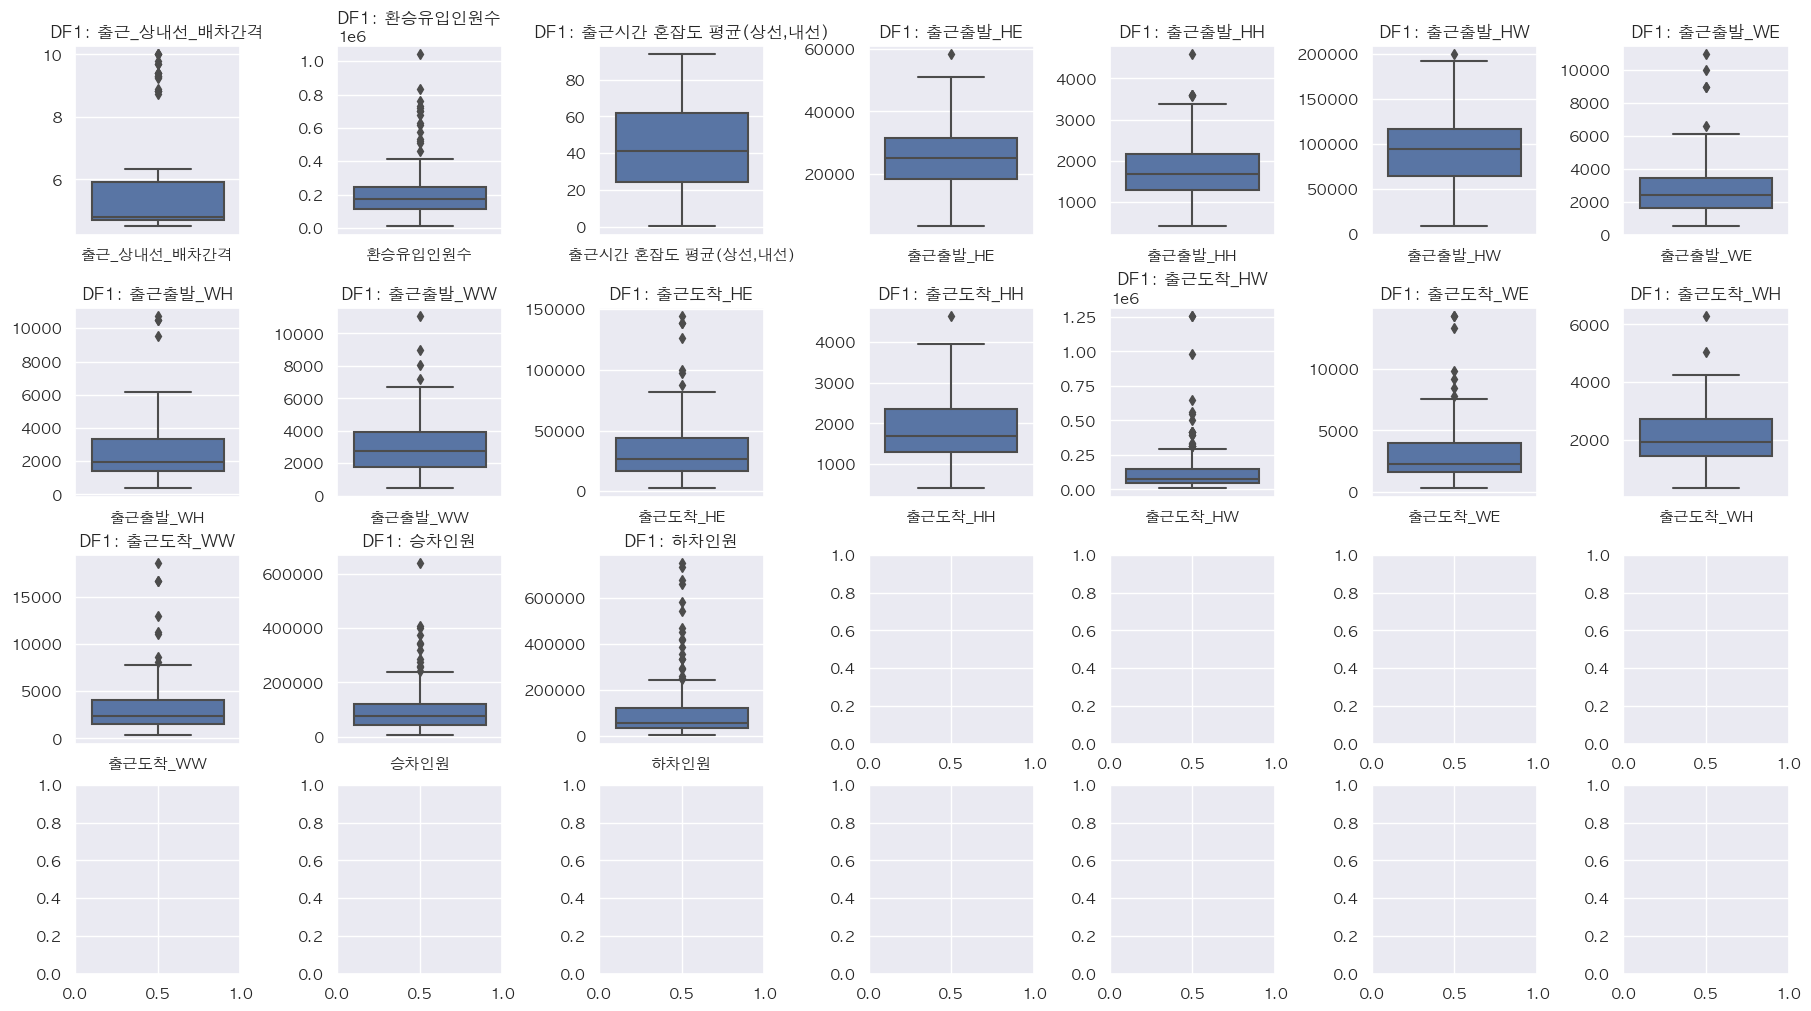

In [ ]:

# 그래프를 그릴 캔버스 생성 (2개)
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

# 각 변수에 대한 Boxplot 그리기 (첫 번째 데이터프레임)
for i, variable in enumerate(출상내1.columns):
    sns.boxplot(x='variable', y='value', data=pd.melt(출상내1[[variable]]), ax=axes[i])
    axes[i].set_title(f'DF1: {variable}')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

# 그래프 보여주기
plt.show()

대부분의 연속형 변수에서 이상치가 확인이 됨 종속변수인 혼잡도만 적당한 정규분포를 이루는 것을 볼 수 있음 <br>
표준화를 위해서는 원래 이상치를 적절히 제거해주어야 하나 나는 레코드가 곧 하나의 지하철 역이므로 데이터를 지우는 것은 옳지 않다고 판단 <br>
때문에 이상치의 영향을 최소로 받는 RobustScaler을 이용하여 정규화

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 스케일링할 변수들 선택
selected_columns = 출상내1.columns.difference(['출근시간 혼잡도 평균(상선,내선)'])
# RobustScaler 초기화
scaler = StandardScaler()

# 선택한 변수들에 대해 스케일링 수행
scaled_data = scaler.fit_transform(출상내1[selected_columns])
# 스케일링된 결과를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=[f"{var}_scaled" for var in selected_columns])


merged_df = pd.concat([출상내1, scaled_df], axis=1);
merged_df = merged_df.drop(selected_columns, axis=1)
merged_df

,"출근시간 혼잡도 평균(상선,내선)",승차인원_scaled,출근_상내선_배차간격_scaled,출근도착_HE_scaled,출근도착_HH_scaled,출근도착_HW_scaled,출근도착_WE_scaled,출근도착_WH_scaled,출근도착_WW_scaled,출근출발_HE_scaled,출근출발_HH_scaled,출근출발_HW_scaled,출근출발_WE_scaled,출근출발_WH_scaled,출근출발_WW_scaled,하차인원_scaled,환승유입인원수_scaled
0,31.771429,0.548251,-0.651310,0.926870,1.820539,1.020260,1.109696,-0.226976,1.548033,-0.051763,0.745443,-0.114567,1.576427,1.284781,2.486757,4.480012,3.634781
1,45.414286,1.836093,-0.630350,-0.284848,0.587426,-0.282425,-0.378606,0.731931,-0.317401,0.559250,0.752544,0.715218,0.320460,-0.425567,0.138059,-0.032408,0.599521
2,36.428571,1.135031,-0.617165,0.754322,1.295298,-0.226812,0.214323,0.306714,-0.152034,0.372836,1.154490,0.906444,-0.521440,0.632601,-0.151217,0.165056,0.945208
3,31.142857,-0.120845,-0.687241,0.224668,0.309940,0.257098,0.430477,-0.154299,0.474545,0.417047,1.232606,0.050731,0.736248,0.276302,1.172914,1.609018,0.904019
4,46.157143,3.548414,-0.641937,0.373876,1.211769,1.518066,0.165624,-0.126096,0.909941,-0.137410,0.002625,0.040556,0.236728,0.091095,-0.266806,2.447434,3.043918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,77.542857,0.441868,-0.552688,-0.594594,-0.671170,-0.515600,-0.537944,1.522704,-0.643599,1.513713,-0.948978,2.065400,0.388706,-0.494455,0.304483,-0.575248,-0.387907
167,29.214286,-0.704515,-0.466786,1.946663,-0.508360,1.523989,2.020875,-0.976529,1.630368,-1.082304,-0.654975,-1.199845,1.106729,0.932999,1.437982,1.335609,0.183722
168,23.385714,-0.383240,-0.319473,0.131228,0.549201,-0.367120,-0.075306,2.323239,-0.235415,1.671323,0.712776,1.487470,0.339385,0.111987,0.037599,-0.519489,-0.694798
169,20.328571,0.851279,-0.239227,-1.044939,-1.251625,-0.692454,-1.061669,-0.674973,-0.976774,-0.635504,-0.684802,-0.628010,-1.130498,-1.011117,-1.186072,-0.374057,0.193271


## PCA

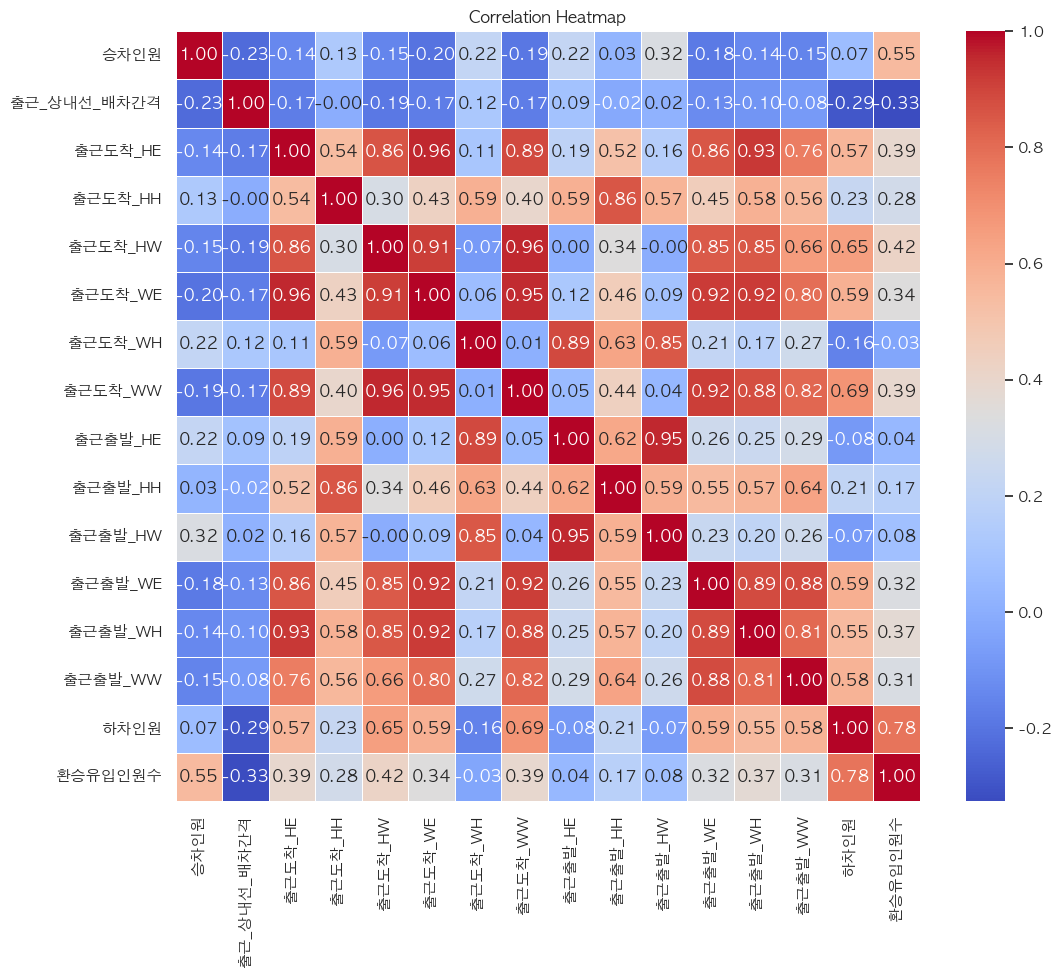

In [ ]:
# 히트맵 데이터 추출
heatmap_data = 출상내1[selected_columns]

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

지금 보아하니 다중공선성이 야랄났음 때문에 하차인원 승차인원 시간대 나누지 말고 병합 실시

In [ ]:
# 데이터 분할
target = merged_df['출근시간 혼잡도 평균(상선,내선)']
data = merged_df.drop('출근시간 혼잡도 평균(상선,내선)', axis=1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)
출상내pca = pca.transform(data)
print(출상내pca.shape)

(171, 3)


In [ ]:
print(pca.explained_variance_ratio_)

[0.59336789 0.1303188  0.11405733]


3개의 주성분으로 데이터의81% 가량을 설명

In [ ]:
# 주성분 벡터 출력
components_df = pd.DataFrame(pca.components_, columns=data.columns)
print("주성분 벡터:")
components_df


주성분 벡터:


,승차인원_scaled,하차인원_scaled,출근_상내선_배차간격_scaled,환승유입인원수_scaled,출근출발_EE_scaled,출근출발_EH_scaled,출근출발_EW_scaled,출근출발_HE_scaled,출근출발_HH_scaled,출근출발_HW_scaled,출근출발_WE_scaled,출근출발_WH_scaled,출근출발_WW_scaled,출근도착_EE_scaled,출근도착_EH_scaled,출근도착_EW_scaled,출근도착_HE_scaled,출근도착_HH_scaled,출근도착_HW_scaled,출근도착_WE_scaled,출근도착_WH_scaled,출근도착_WW_scaled
0,-0.028636,0.322438,-0.069548,0.170301,0.218516,0.128285,0.215687,0.032401,0.108057,0.028411,0.231617,0.223889,0.169236,0.281819,0.037974,0.376039,0.226100,0.083973,0.425000,0.245767,0.014842,0.288116
1,-0.143184,-0.470982,0.265675,-0.371774,0.126423,0.159151,0.111314,0.314471,0.257034,0.281455,0.106370,0.112485,0.106076,0.093098,0.266949,-0.023893,0.077245,0.183053,-0.082796,0.062842,0.291524,-0.003609
2,0.542858,0.208954,-0.178701,0.456566,0.014123,0.061944,0.006341,0.275700,0.175308,0.299469,-0.030931,-0.015644,0.027290,-0.066480,0.226743,-0.138667,-0.028293,0.176374,-0.192480,-0.089765,0.235607,-0.105940


In [ ]:
# 주성분의 고유값 출력
explained_variance_df = pd.DataFrame(pca.explained_variance_, columns=['Explained Variance'])
print("\n주성분의 고유값:")
explained_variance_df


주성분의 고유값:


,Explained Variance
0,14.502909
1,3.185211
2,2.787753


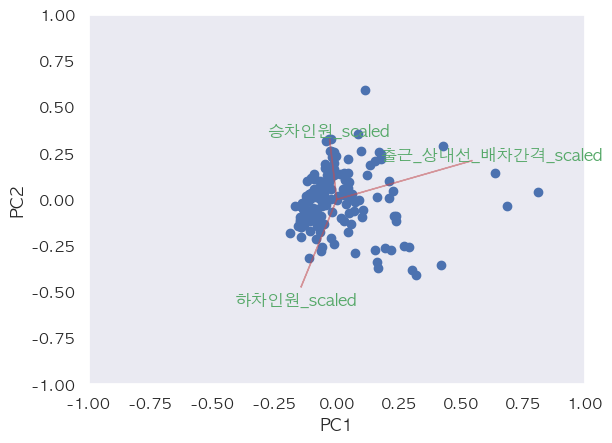

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
biplot(출상내pca, pca.components_, 1, 2, labels=components_df.columns)